In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [6]:
data = pd.read_csv('/content/parkinsons.csv')
data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.tail(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [9]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
data=data.loc[:,['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
    ]


In [11]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
#intraclass and interclass distances
from scipy.spatial import distance
attribute1 = 'MDVP:Fo(Hz)'
attribute2 = 'MDVP:Fhi(Hz)'

distances = distance.pdist(data[[attribute1, attribute2]], 'euclidean')
intrapoint_distance_std = distances.std()
print(intrapoint_distance_std)
intrapoint_distance = distances.mean()
print(intrapoint_distance)
distances

98.05028376622691
102.73180301412553


array([  8.9808445 ,  26.39932918,  19.71191561, ..., 158.79181248,
        44.48812409, 137.56286374])

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>],
       [<Axes: title={'center': 'MDVP:Jitter(Abs)'}>,
        <Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>],
       [<Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>,
        <Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>],
       [<Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>, <Axes: >, <Axes: >]],
      dtype=object)

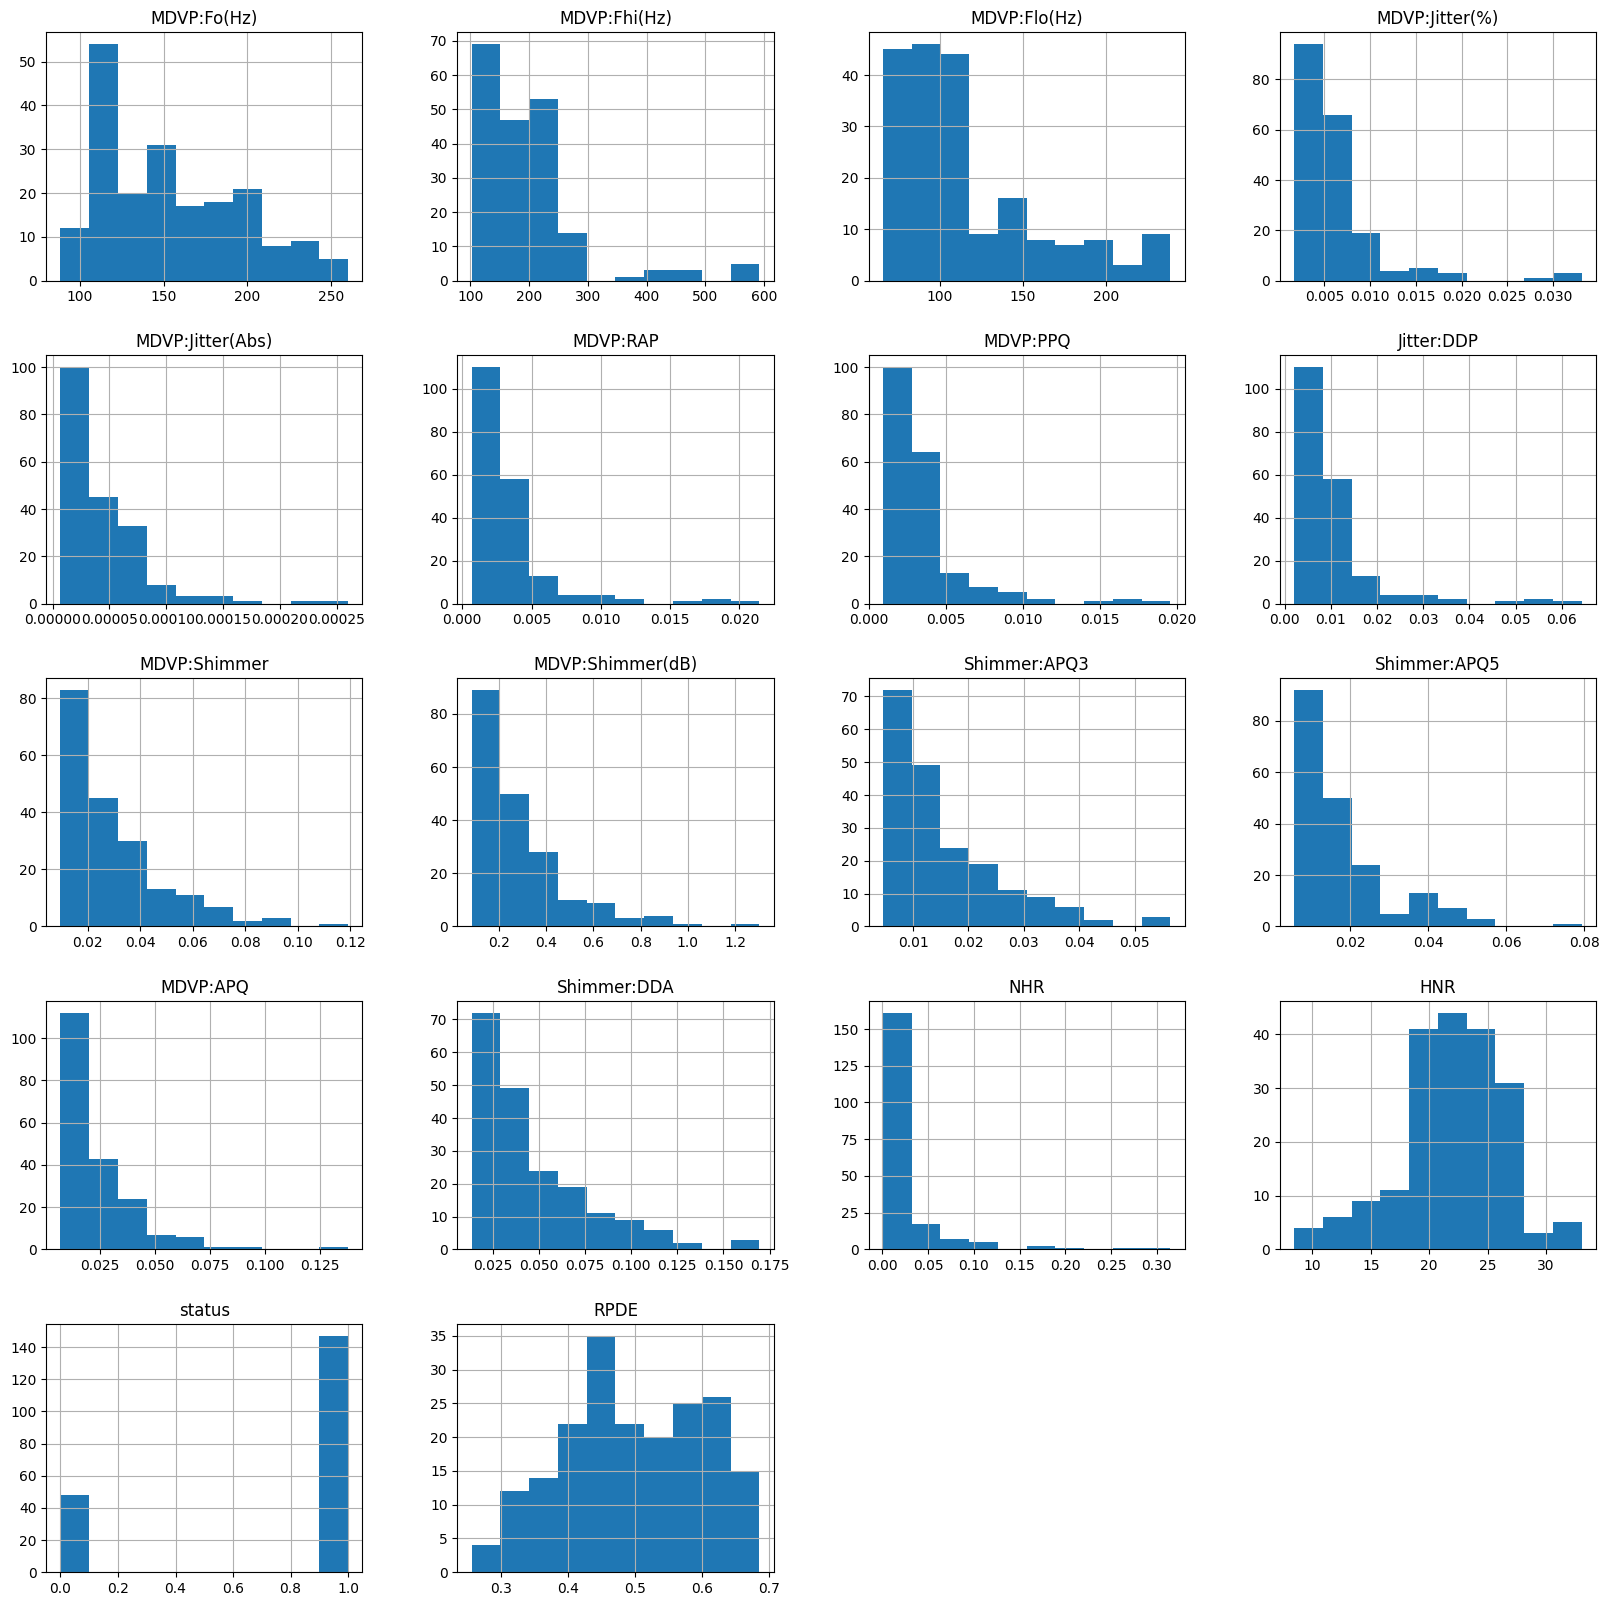

In [13]:
data.hist(column=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE'], figsize=(20,20))

In [14]:
# select one feature vector
feature_vector_1 = np.array(data['MDVP:Fo(Hz)'])
feature_vector_1 = feature_vector_1.reshape(-1, 1)

feature_vector_2 = np.array(data['MDVP:Fhi(Hz)'])
feature_vector_2 = feature_vector_2.reshape(-1, 1)


feature_vector_1.mean(axis=0)
feature_vector_2.mean(axis=0)

print('FV-1 >> Mean >> ', feature_vector_1.mean(axis=0))
print('FV-2 >> Mean >> ', feature_vector_2.mean(axis=0))

FV-1 >> Mean >>  [154.22864103]
FV-2 >> Mean >>  [197.10491795]


In [15]:
centroid_vector_1 = np.mean(feature_vector_1, axis=0)
centroid_vector_2 = np.mean(feature_vector_2, axis=0)

print('FV-1 >> Centroid >> ', centroid_vector_1)
print('FV-2 >> Centroid >> ', centroid_vector_2)

FV-1 >> Centroid >>  [154.22864103]
FV-2 >> Centroid >>  [197.10491795]


In [16]:
intraclass_spread_1 = np.mean(np.linalg.norm(feature_vector_1 - centroid_vector_1, axis=1))
intraclass_spread_2 = np.mean(np.linalg.norm(feature_vector_2 - centroid_vector_2, axis=1))

print('FV-1 >> Intraclass Spread >> ', intraclass_spread_1)
print('FV-2 >> Intraclass Spread >> ', intraclass_spread_2)

FV-1 >> Intraclass Spread >>  34.67476344510191
FV-2 >> Intraclass Spread >>  59.506133070348454


In [17]:
interclass_distance = np.linalg.norm(centroid_vector_1 - centroid_vector_2)

print('Interclass Distance:', interclass_distance)

Interclass Distance: 42.876276923076944


Mean >>  197.10491794871797
Variance >>  1704.3521396249837


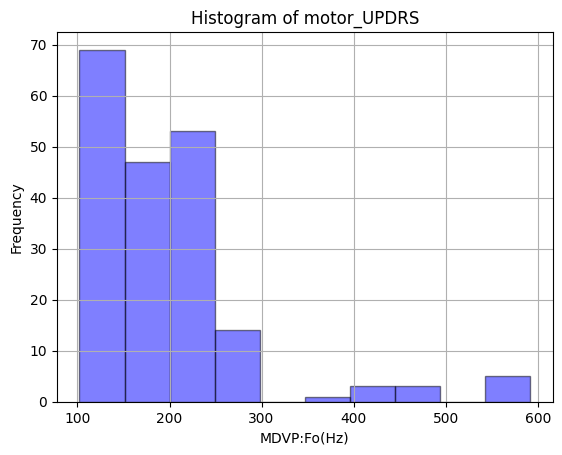

In [18]:
#A2.



num_bins = 10
hist, bins = np.histogram(data['MDVP:Fhi(Hz)'], bins=num_bins)

mean = np.mean(data['MDVP:Fhi(Hz)'])
variance = np.var(data['MDVP:Fo(Hz)'])

#plot histogram
plt.hist(data['MDVP:Fhi(Hz)'], bins=num_bins, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.title('Histogram of motor_UPDRS')
plt.grid(True)


print("Mean >> ", mean)
print("Variance >> ", variance)

plt.show()

In [ ]:
from scipy.spatial import distance

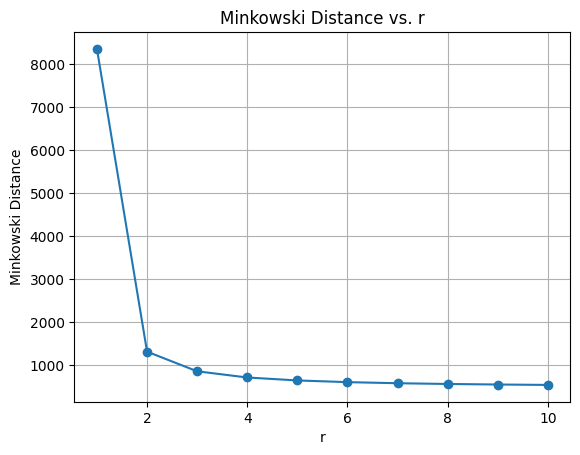

In [19]:
#A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
# to 10. Make a plot of the distance and observe the nature of this graph.

vector1 = np.array(data['MDVP:Fo(Hz)'])
vector2 = np.array(data['MDVP:Fhi(Hz)'])

r_values = range(1, 11) # r = 1 to 10

distance = [distance.minkowski(vector1, vector2, p=r) for r in r_values]

plt.plot(r_values, distance, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()



In [20]:
#getting some statistical measures of data
data.describe()




,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [21]:
# distribution of target Variable
data['status'].value_counts()
#o means healthy
#1 means person is diagnosed with parkinsons

1    147
0     48
Name: status, dtype: int64

In [23]:
#grouping the data based on status
# grouping the data bas3ed on the target variable
data.groupby('status').mean()

<ipython-input-23-6044d5830bd7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [26]:
#SPLITTING DATASET FOR IMPLEMENTING K-NEAREST NEIGHBOURS
X = data.drop(columns=['name','status'], axis=1)
Y = data['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [27]:
#K NEAREST NEIGHBOURS
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=3)

In [30]:
#ACCURACY SCORING

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
neigh.fit(X_train, Y_train)

# Evaluate the KNN classifier on the test data and calculate accuracy
accuracy = neigh.score(X_test, Y_test)

print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.7692307692307693


In [32]:
# Make predictions on the test data
#make predictions on the test data using neigh.predict()

predictions = neigh.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

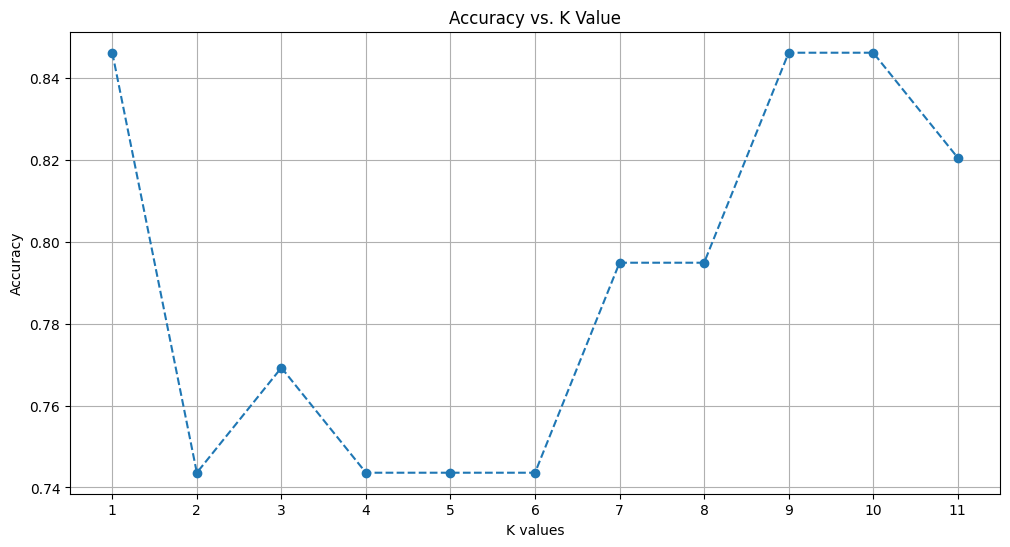

In [36]:
k_values = range(1, 12)

accu_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    accu_scores.append(accuracy)

#plot the accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(k_values, accu_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [38]:
#CONFUSION MATRIX
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

confusion_matrix_train = confusion_matrix(Y_train, Y_train_pred)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_pred)

# precision, recall and F1-score for training data
precision_train = precision_score(Y_train, Y_train_pred, average='micro')
recall_train = recall_score(Y_train, Y_train_pred, average='micro')
f1_score_train = f1_score(Y_train, Y_train_pred, average='micro')

# precision, recall and F1-score for test data

precision_test = precision_score(Y_test, Y_test_pred, average='micro')
recall_test = recall_score(Y_test, Y_test_pred, average='micro')
f1_score_test = f1_score(Y_test, Y_test_pred, average='micro')

# Print the confusion matrix and other metrics
print('Confusion Matrix - Training Data')
print(confusion_matrix_train)
print('Precision - Training Data', precision_train)
print('Recall - Training Data', recall_train)
print('F1 score - Training Data', f1_score_train)

print('Confusion Matrix - Test Data')
print(confusion_matrix_test)
print('Precision - Test Data', precision_test)
print('Recall - Test Data', recall_test)
print('F1 score - Test Data', f1_score_test)

Confusion Matrix - Training Data
[[ 21  19]
 [  5 111]]
Precision - Training Data 0.8461538461538461
Recall - Training Data 0.8461538461538461
F1 score - Training Data 0.8461538461538461
Confusion Matrix - Test Data
[[ 4  4]
 [ 3 28]]
Precision - Test Data 0.8205128205128205
Recall - Test Data 0.8205128205128205
F1 score - Test Data 0.8205128205128205
